# ML-SPRINT-3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
df=pd.read_csv("Amazon_review.csv")

In [3]:
df.head()

,Unnamed: 0,ProductId,UserId,Time,profile_Name,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Review_summary,Review_Text,Rating,sentiment
0,0,B00813GRG4,A1D87F6ZCVE5NK,05:30:00,dll pa,0.0,0.0,1.0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative
1,1,B000LQOCH0,ABXLMWJIXXAIN,05:30:00,"Natalia Corres ""Natalia Corres""",1.0,1.0,1.0,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive
2,2,B000UA0QIQ,A395BORC6FGVXV,05:30:00,Karl,3.0,3.0,1.0,Cough Medicine,If you are looking for the secret ingredient i...,2,negative
3,3,B006K2ZZ7K,A1UQRSCLF8GW1T,05:30:00,"Michael D. Bigham ""M. Wassir""",0.0,0.0,1.0,Great taffy,Great taffy at a great price. There was a wide...,5,positive
4,4,B006K2ZZ7K,ADT0SRK1MGOEU,05:30:00,Twoapennything,0.0,0.0,1.0,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,positive


In [4]:
temp_df=df[['Review_Text','sentiment']]

In [5]:
temp_df.head()

,Review_Text,sentiment
0,Product arrived labeled as Jumbo Salted Peanut...,negative
1,This is a confection that has been around a fe...,positive
2,If you are looking for the secret ingredient i...,negative
3,Great taffy at a great price. There was a wide...,positive
4,I got a wild hair for taffy and ordered this f...,positive


In [6]:
temp_df.shape

(568453, 2)

In [7]:
temp_df['sentiment'].value_counts()

positive    443776
negative     82037
not          42640
Name: sentiment, dtype: int64

In [8]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

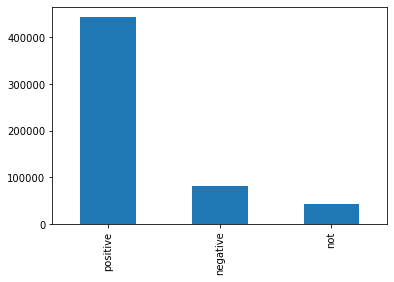

In [9]:
temp_df['sentiment'].value_counts().plot(kind='bar')

In [10]:
dic={'positive':1,'negative':0,'not':0}
temp_df['sentiment']=temp_df['sentiment'].replace(dic)

In [11]:
temp_df['sentiment'].value_counts()

1    443776
0    124677
Name: sentiment, dtype: int64

In [12]:
temp_df.head()

,Review_Text,sentiment
0,Product arrived labeled as Jumbo Salted Peanut...,0
1,This is a confection that has been around a fe...,1
2,If you are looking for the secret ingredient i...,0
3,Great taffy at a great price. There was a wide...,1
4,I got a wild hair for taffy and ordered this f...,1


1    443776
0    124677
Name: sentiment, dtype: int64

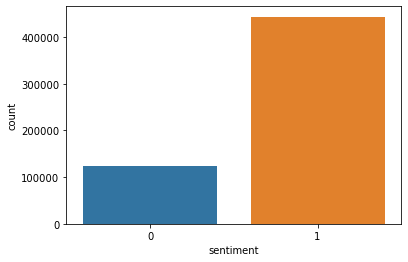

In [13]:
sns.countplot(temp_df['sentiment'])
temp_df['sentiment'].value_counts()

In [14]:
words = ' '.join(temp_df['Review_Text'])
print(words[:2000])


Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". This is a confection that has been around a few centuries. It is a light pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. "Lewis" "The Lion The Witch and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch. If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal. Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was ve

# Data preprocessing

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [18]:
def preprocess(raw_text):
 
    #removing special characters & digit
  letters_only = re.sub("[^a-zA-Z]"," ",raw_text)
    
    #change sentence to lower case
  letters_only = letters_only.lower()
    
    #tokenize into words
  words = letters_only.split()
    
    #remove stopwords
  words = [w for w in words if not w in stopwords.words('english')]
    
    #stemming/lemmatization

  words = [stemmer.stem(word) for word in words]
  clean_text_lst = " ".join(words) 
  
  return  clean_text_lst

In [19]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [20]:
temp_df['clean_text_list'] = temp_df['Review_Text'].progress_apply(lambda x: preprocess(x))

100%|████████████████████████████████████████████████████████████████████████| 568453/568453 [5:53:54<00:00, 26.77it/s]


In [21]:
temp_df.shape

(568453, 3)

In [22]:
temp_df.head()

,Review_Text,sentiment,clean_text_list
0,Product arrived labeled as Jumbo Salted Peanut...,0,product arriv label jumbo salt peanut peanut a...
1,This is a confection that has been around a fe...,1,confect around centuri light pillowi citru gel...
2,If you are looking for the secret ingredient i...,0,look secret ingredi robitussin believ found go...
3,Great taffy at a great price. There was a wide...,1,great taffi great price wide assort yummi taff...
4,I got a wild hair for taffy and ordered this f...,1,got wild hair taffi order five pound bag taffi...


In [37]:
temp = temp_df[['sentiment','clean_text_list']]
temp.head()

,sentiment,clean_text_list
0,0,product arriv label jumbo salt peanut peanut a...
1,1,confect around centuri light pillowi citru gel...
2,0,look secret ingredi robitussin believ found go...
3,1,great taffi great price wide assort yummi taff...
4,1,got wild hair taffi order five pound bag taffi...


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train,test = train_test_split(temp,test_size = 0.3,random_state=42)

In [26]:
train_clean_text = []
for i in train['clean_text_list']:
  train_clean_text.append(i)

test_clean_text = []
for i in test['clean_text_list']:
  test_clean_text.append(i) 

# Bag of words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vec = CountVectorizer(ngram_range=(1,2))
train_feature = vec.fit_transform(train_clean_text)

test_feature = vec.transform(test_clean_text)

In [29]:
vec.vocabulary_

{'tri': 2433253,
 'altern': 64750,
 'product': 1809858,
 'senseo': 2049422,
 'coffe': 458484,
 'maker': 1398680,
 'found': 918802,
 'offer': 1590979,
 'best': 203087,
 'combin': 471784,
 'qualiti': 1851829,
 'valu': 2505789,
 'tri altern': 2433400,
 'altern product': 65701,
 'product senseo': 1817148,
 'senseo coffe': 2049471,
 'coffe maker': 460666,
 'maker found': 1399082,
 'found offer': 921138,
 'offer best': 1591083,
 'best combin': 203672,
 'combin qualiti': 472703,
 'qualiti valu': 1854089,
 'well': 2570928,
 'yeah': 2635784,
 'sauc': 2003549,
 'awesom': 142489,
 'lot': 1363661,
 'fun': 950246,
 'especi': 768723,
 'friend': 937343,
 'say': 2011381,
 'cant': 349232,
 'hot': 1128054,
 'searious': 2028282,
 'everyon': 786161,
 'know': 1263240,
 'said': 1985647,
 'hottest': 1130386,
 'thing': 2363717,
 'ever': 781927,
 'sinc': 2099183,
 'im': 1155969,
 'kinda': 1256328,
 'use': 2493248,
 'great': 1027573,
 'tast': 2315579,
 'pay': 1688723,
 'attent': 129811,
 'dont': 683222,
 'drop'

# model building

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
"""classifiers = [
              LogisticRegression(),
              DecisionTreeClassifier(),
              
]"""

'classifiers = [\n              LogisticRegression(),\n              DecisionTreeClassifier(),\n              \n]'

In [34]:
log_model = LogisticRegression()

In [35]:
log_model.fit(train_feature,train['sentiment'])
pred = log_model.predict(test_feature) 
accuracy = accuracy_score(pred,test['sentiment'])

print('Accuracy of '+log_model.__class__.__name__+' is ' +str(accuracy))

Accuracy of LogisticRegression is 0.9308591734296571


In [36]:
model = LogisticRegression()

model.fit(train_feature,train['sentiment'])

LogisticRegression()

In [44]:
import pickle

In [45]:
pkl_filename = "logit_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [46]:
pkl_filename = "countvectorizer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(vec, file)

In [47]:
# prediction the future data point
from pickle import load

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
def predict(new_review):
  #loading pretrained CountVetcorizer from pickle file
  vectorizer = load(open('/content/countvectorizer.pkl', "rb"))

  #loading prediction logistics regression
  classifier = load(open('/content/logit_model.pkl',"rb"))

  #Preprocessing the tweet
  clean_review = preprocess(new_review)

  #converting text to numerical vector
  clean_review_encoded = vectorizer.transform([clean_review])

  #prediction
  prediction = classifier.predict(clean_review_encoded)
  return prediction

In [ ]:
new_review = input("Enter a review to check its sentiment: ")

prediction = predict(new_review)


print(prediction)